In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [41]:
letter_X = torch.Tensor(10, 1, 20, 20)
letter_O = torch.Tensor(10, 1, 20, 20)
letter_U = torch.Tensor(10, 1, 20, 20)

In [42]:
import random
center_x = 10
center_y = 10
def draw_line(matrix, point1, point2):
    # Bresenham algo FDF
    x1, y1 = point1
    x2, y2 = point2
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy
    while x1 != x2 or y1 != y2:
        matrix[y1, x1] = 255  # Set the pixel to 255 (white)
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
    return matrix

def generate_centered_X_image(size=20):
    image = torch.zeros((size, size), dtype=torch.uint8)
    start = random.randint(4, 8)
    end = random.randint(13, 17)
    image = draw_line(image, (start, start), (end, end))
    start = random.randint(4, 8)
    end = random.randint(13, 17)
    image = draw_line(image, (start, size-start), (end, size-end))
    return image

def generate_centered_O_image(size=20):
    image = torch.zeros((size, size), dtype=torch.uint8)
    x_length = random.randint(5, 13)
    y_length = random.randint(5, 13)
    corner1 = [center_x - int(x_length/2), center_y - int(y_length/2)]
    corner2 = [center_x + int(x_length/2), center_y + int(y_length/2)]
    min_row = min(corner1[0], corner2[0])
    max_row = max(corner1[0], corner2[0])
    min_col = min(corner1[1], corner2[1])
    max_col = max(corner1[1], corner2[1])
    for col in range(min_col+1, max_col):
        image[min_row][col] = 255  # Top edge
        image[max_row][col] = 255  # Bottom edge
    for row in range(min_row+1, max_row):
        image[row][min_col] = 255  # Left edge
        image[row][max_col] = 255  # Right edge
    return image

def generate_centered_U_image(size=20):
    image = torch.zeros((size, size), dtype=torch.uint8)
    x_length = random.randint(5, 13)
    y_length = random.randint(5, 13)
    corner1 = [center_x - int(x_length/2), center_y - int(y_length/2)]
    corner2 = [center_x + int(x_length/2), center_y + int(y_length/2)]
    min_row = min(corner1[0], corner2[0])
    max_row = max(corner1[0], corner2[0])
    min_col = min(corner1[1], corner2[1])
    max_col = max(corner1[1], corner2[1])
    for col in range(min_col+1, max_col):
        image[max_row][col] = 255  # Bottom edge
    for row in range(min_row+1, max_row):
        image[row][min_col] = 255  # Left edge
        image[row][max_col] = 255  # Right edge
    return image

In [43]:
letter_X[:,0,:,:] = torch.stack([generate_centered_X_image() for _ in range(10)])
letter_O[:,0,:,:] = torch.stack([generate_centered_O_image() for _ in range(10)])
letter_U[:,0,:,:] = torch.stack([generate_centered_U_image() for _ in range(10)])

In [44]:
from Lec7ImageStuff import PlotImages
images = torch.cat((letter_X, letter_O, letter_U), dim=0)
targets = np.concatenate((np.zeros(10, dtype=int), np.ones(10, dtype=int), 2*np.ones(10, dtype=int)))
images.shape
targets.shape

(30,)

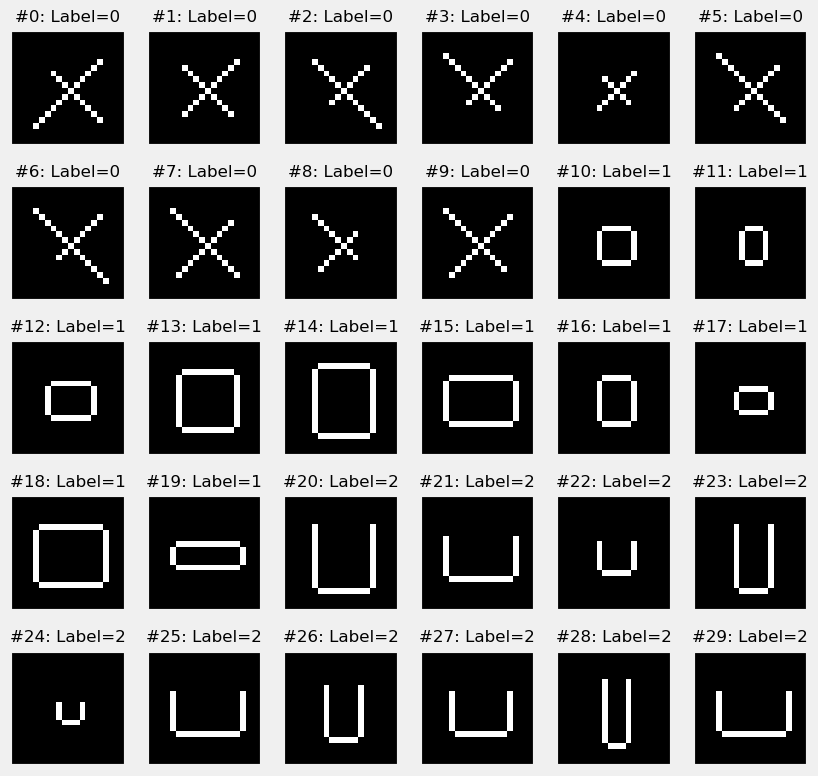

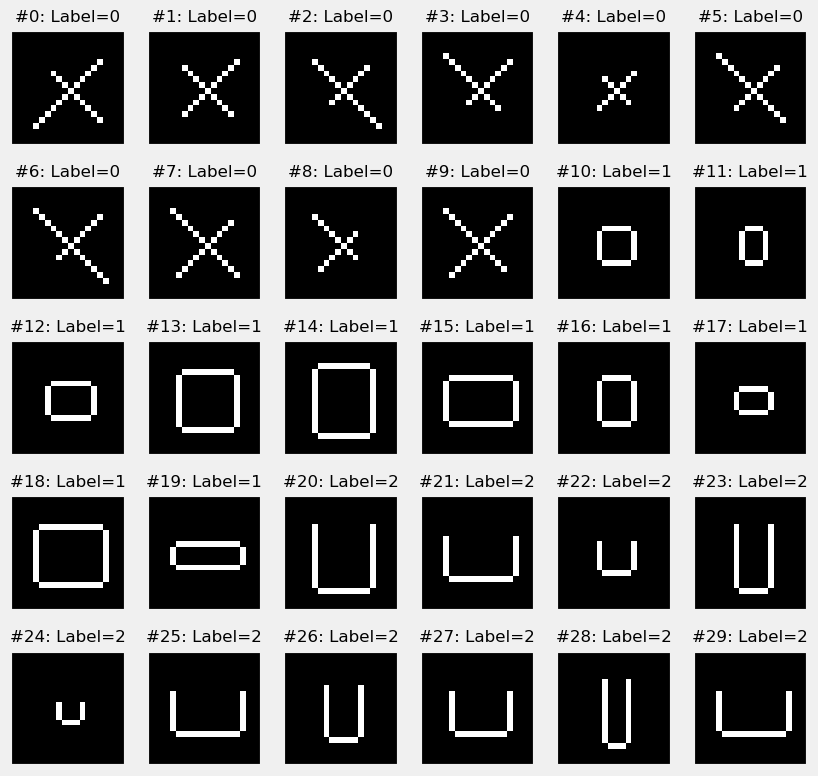

In [18]:
PlotImages(images, targets, 30, 6)

In [20]:
from torchvision.transforms.functional import  rotate
from torchvision.transforms import  RandomHorizontalFlip, RandomVerticalFlip 

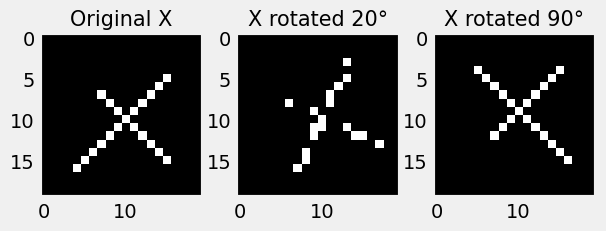

In [33]:
X_rotate = rotate(letter_X[0], 20)
X_rotate90 = rotate(letter_X[0], 90)
plt.subplot(1,3 ,1)
plt.imshow(letter_X[0].squeeze(dim=0), cmap='gray')
plt.title('Original X', fontsize=15)
plt.grid(None)
plt.subplot(1,3 ,2)
plt.imshow(X_rotate.squeeze(dim=0), cmap='gray')
plt.title('X rotated 20°', fontsize=15)
plt.grid(None)
plt.subplot(1,3 ,3)
plt.imshow(X_rotate90.squeeze(dim=0), cmap='gray')
plt.title('X rotated 90°', fontsize=15)
plt.grid(None)

In [45]:
letter_X_aug = torch.Tensor(100, 1, 20, 20)
letter_O_aug = torch.Tensor(100, 1, 20, 20)
letter_U_aug = torch.Tensor(100, 1, 20, 20)
letter_U_aug[:10] = letter_U
letter_X_aug[:10] = letter_X
letter_O_aug[:10] = letter_O
for i in range(1, 10):
    available_transforms = [
    RandomVerticalFlip(1),
    RandomHorizontalFlip(1),
    lambda x: rotate(x, int(random.choice([90,180, 270])))
]
    selected_transform = random.choice(available_transforms)
    """
    rand_transform = transforms.Compose([
        ToPILImage(),
        selected_transform(),
        ToTensor()])
    """
    print(selected_transform)
    letter_X_aug[i*10: (i+1)*10] = torch.cat([selected_transform(letter_X[j]) for j in range(10)], dim=0).unsqueeze(dim=1)
    letter_U_aug[i*10: (i+1)*10] = torch.cat([selected_transform(letter_U[j]) for j in range(10)], dim=0).unsqueeze(dim=1)
    letter_O_aug[i*10: (i+1)*10] = torch.cat([selected_transform(letter_O[j]) for j in range(10)], dim=0).unsqueeze(dim=1)

RandomHorizontalFlip(p=1)
<function <lambda> at 0x7faf78e62940>
RandomVerticalFlip(p=1)
RandomHorizontalFlip(p=1)
RandomVerticalFlip(p=1)
RandomHorizontalFlip(p=1)
RandomVerticalFlip(p=1)
RandomHorizontalFlip(p=1)
RandomVerticalFlip(p=1)


<Figure size 1000x1000 with 0 Axes>

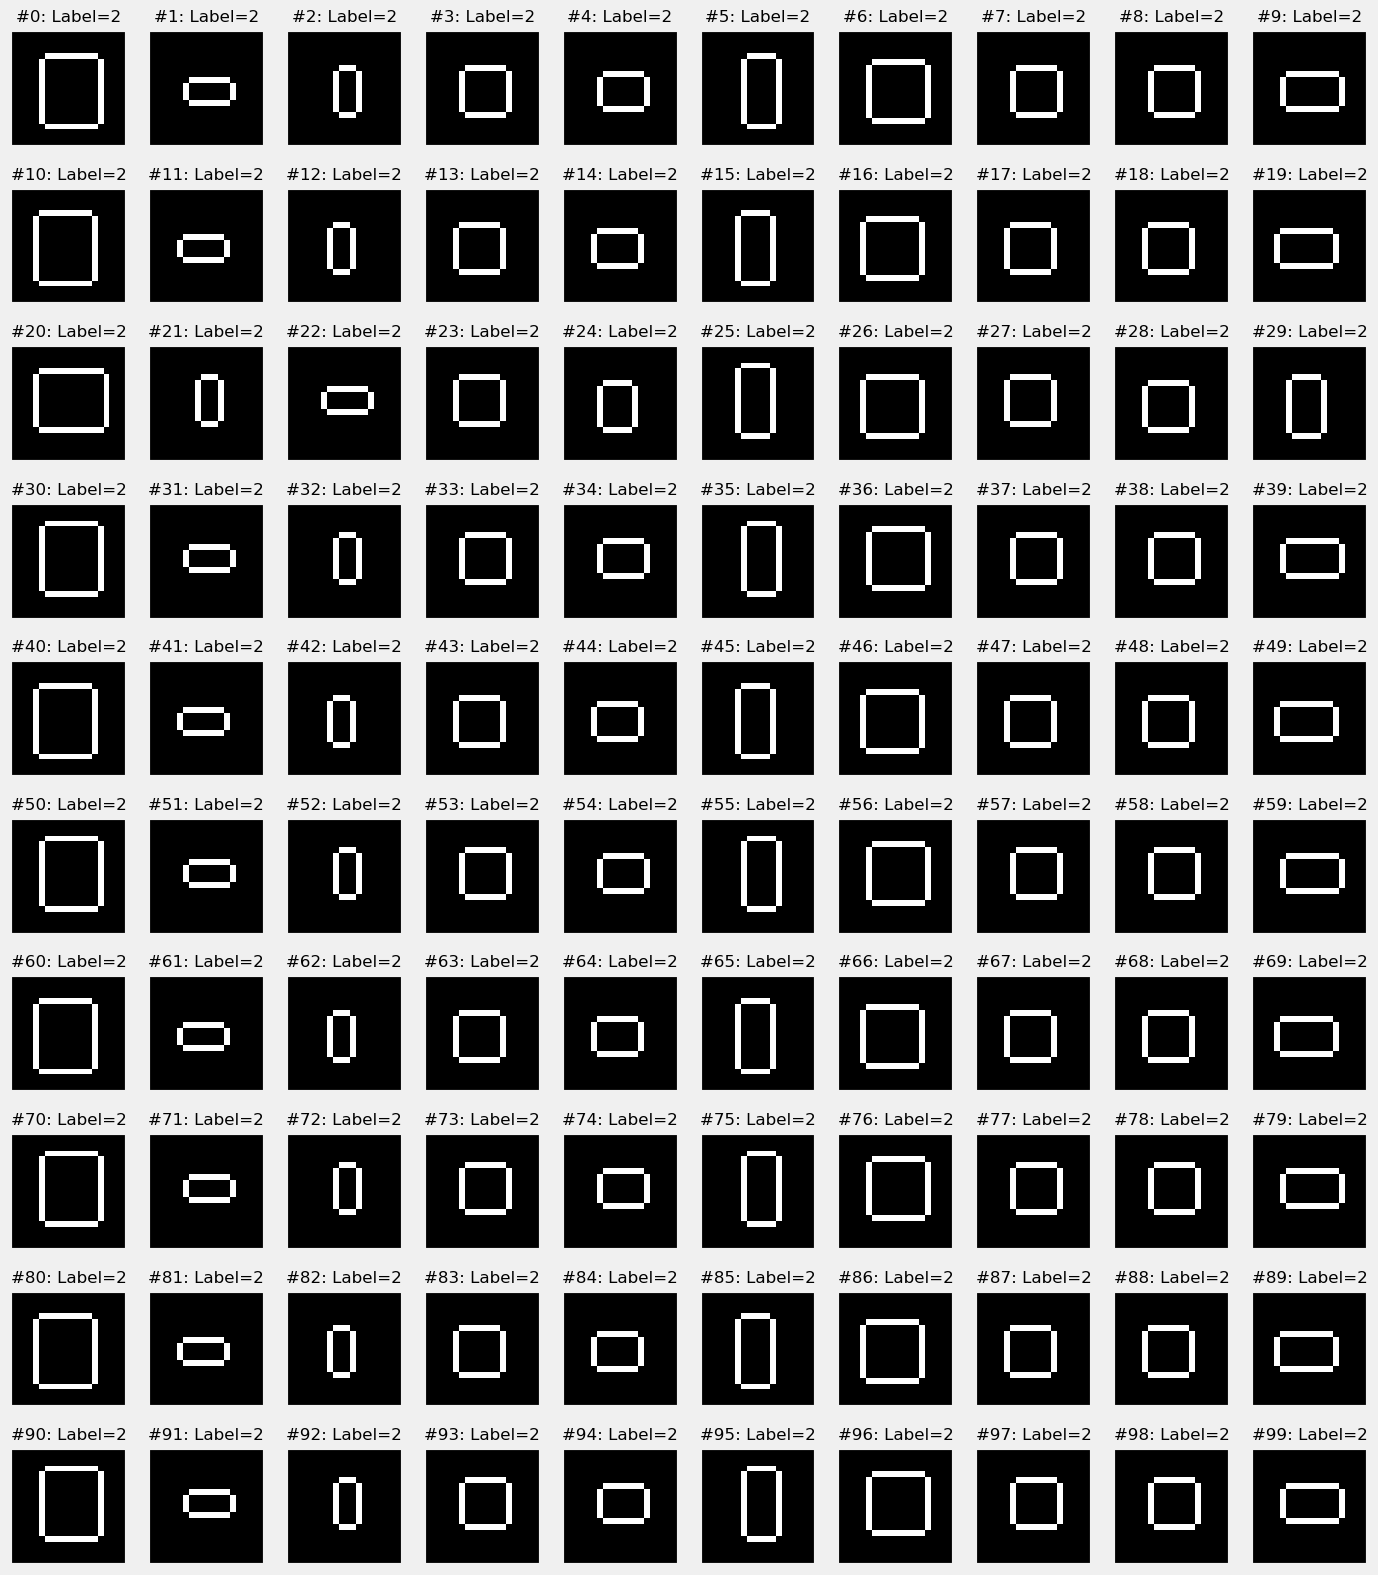

In [46]:
#img = PlotImages(letter_X_aug, np.zeros(100, dtype=int), 100, 10)
#img = PlotImages(letter_U_aug, np.ones(100, dtype=int), 100, 10)
plt.figure(figsize=(10, 10))
img = PlotImages(letter_O_aug, 2*np.ones(100, dtype=int), 100, 10)
plt.savefig('augmented_letters.png')

In [47]:
X = torch.cat([letter_X_aug, letter_O_aug, letter_U_aug], dim =0)
y = torch.cat([torch.zeros(100), torch.ones(100), 2*torch.ones(100)], dim=0)
print("Letters shape: ", X.shape)
print("Targets shape:", y.shape)


Letters shape:  torch.Size([300, 1, 20, 20])
Targets shape: torch.Size([300])


In [3]:
np.save('./X.npy', X)
np.save('./y.npy', y)

NameError: name 'X' is not defined

In [2]:
### PART D
import numpy as np
import torch
Images = np.load('./X.npy')
labels = np.load('./y.npy')
X=  torch.as_tensor(Images[:200]/255.0).float()
y=  torch.as_tensor(labels[:200]).float()


In [3]:
import torch.nn as nn
torch.manual_seed(17)
bc_model = nn.Sequential()
bc_model.add_module('flatten', nn.Flatten())
bc_model.add_module('linear', nn.Linear(400, 1, bias=False))
bc_model.add_module('sigmoid', nn.Sigmoid())

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
from torch.utils.data import Dataset
class TransformedTensorDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x
        self.y = y
        self.transform = transform
    
    def __getitem__(self, index):
        x = self.x[index]
        if self.transform:
            x = self.transform(x)
        return x, self.y[index]

    def __len__(self):
        return len(self.x)

In [7]:
from torchvision.transforms import Normalize
X_bin = X[:200]
y_bin = y[:200].unsqueeze(dim=1)
print(X_bin.shape, y_bin.shape)
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42, shuffle = True)
transform = Normalize(mean=(.5,), std=(.5,))
train_dataset = TransformedTensorDataset(X_train, y_train, transform=transform)
val_dataset = TransformedTensorDataset(X_test, y_test, transform=transform)

torch.Size([200, 1, 20, 20]) torch.Size([200, 1])


In [8]:
import torch.optim as optim
from Lec7sbs import StepByStep
from torch.utils.data import TensorDataset, DataLoader
# Generate loaders
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=10, shuffle=True)
lr = 1e-3
optimizer = optim.SGD(bc_model.parameters(), lr=lr)
# Defines a BCE without logits loss function (uses probabilities)
loss_fn = nn.BCELoss()

# MODEL TRAINING
n_epochs = 10
bc_sbs=StepByStep(bc_model, loss_fn, optimizer)


In [9]:
bc_sbs.set_loaders(train_loader, test_loader)
bc_sbs.train(n_epochs)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


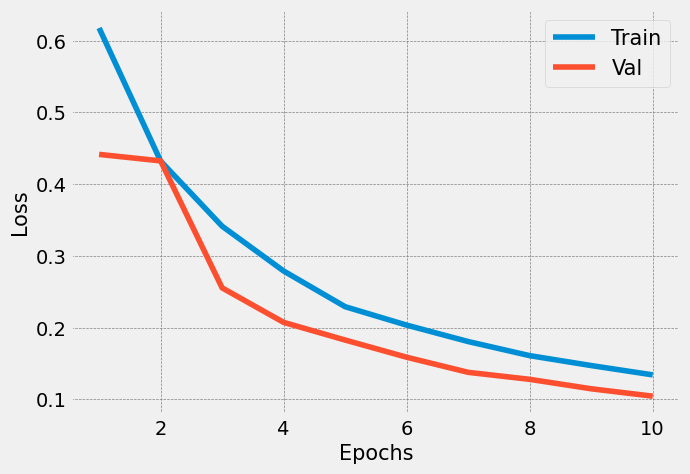

In [10]:
epochs = np.arange(1, n_epochs+1)
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.plot(epochs, bc_sbs.losses, label='Train')
plt.plot(epochs, bc_sbs.val_losses, label='Val')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(fontsize=15)
plt.grid(linewidth=0.5, color='gray', linestyle='--')

In [11]:
y_pred =bc_sbs.model(X_test)
predictions = (y_pred >= 0.5).float()
TP = (predictions * y_test).sum().item()
TN = ((1 - predictions) * (1 - y_test)).sum().item()
FP = (predictions * (1 - y_test)).sum().item()
FN = ((1 - predictions) * y_test).sum().item()

# Calculate TPR, FPR, and Accuracy
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
accuracy = (TP + TN) / (TP + FP + FN + TN)

print(f"TPR: {TPR:.4f}, FPR: {FPR:.4f}, Accuracy: {accuracy:.4f}")

TPR: 1.0000, FPR: 0.0000, Accuracy: 1.0000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


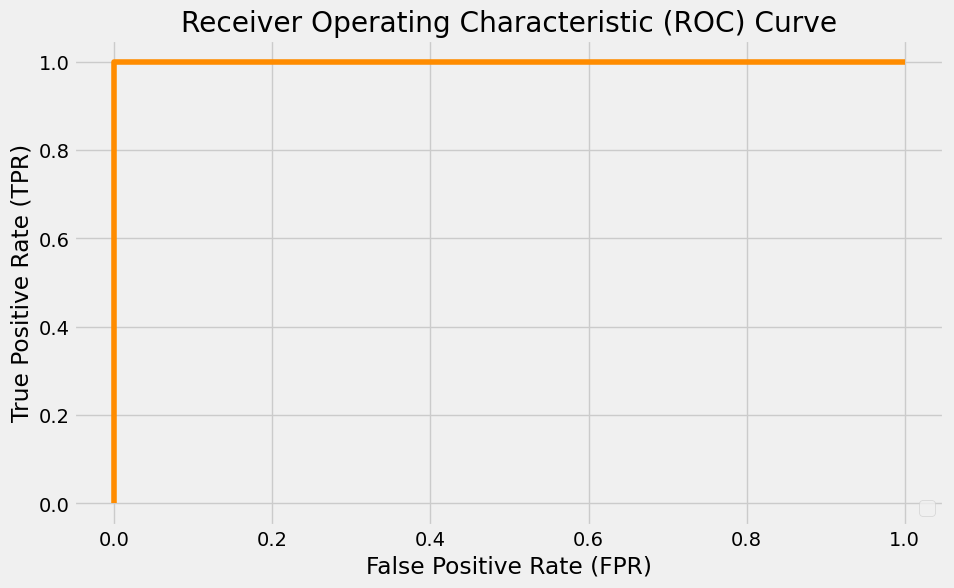

In [12]:
from sklearn import metrics
y_pred =bc_sbs.model(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred.detach().numpy())
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()